In [4]:
import pickle

from cleanlab.object_detection.rank import get_label_quality_scores, issues_from_scores

# 1. Load the annotations and results (this would be provided by the user)

In [5]:
results = pickle.load(open("results.pkl", "rb"))
annotations = pickle.load(open("dataset.pkl", "rb"))

Annotations contains a list of dictionaries where each annotation is a dictionary that has to contian at least `bboxes` and `labels` dictionary entries. Our annotations is created from mmdet model and therefore comes with extra keys.

`bboxes[j]` is in the format `[x,y,w,h]` with given label `labels[j]`

In [6]:
len(annotations), len(annotations[0])

(20, 5)

In [7]:
annotations[0]

{'bboxes': array([[388.66,  69.92, 498.07, 347.54],
        [  0.  , 262.81,  62.16, 299.58],
        [119.4 , 272.51, 144.22, 306.76],
        [141.47, 267.91, 173.66, 303.77]], dtype=float32),
 'labels': array([3, 3, 2, 2]),
 'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
 'masks': [[[446.71,
    70.66,
    466.07,
    72.89,
    471.28,
    78.85,
    473.51,
    88.52,
    473.51,
    98.2,
    462.34,
    111.6,
    475.74,
    126.48,
    484.67,
    136.16,
    494.35,
    157.74,
    496.58,
    174.12,
    498.07,
    182.31,
    485.42,
    189.75,
    474.25,
    189.01,
    470.53,
    202.4,
    475.74,
    337.12,
    469.04,
    347.54,
    455.65,
    343.08,
    450.44,
    323.72,
    441.5,
    255.99,
    433.32,
    250.04,
    406.52,
    340.1,
    397.59,
    344.56,
    388.66,
    330.42,
    408.01,
    182.31,
    396.85,
    186.77,
    392.38,
    177.84,
    389.4,
    166.68,
    390.89,
    147.32,
    418.43,
    119.04,
    434.06,
    111.6

Results is a list of `np.ndarray` list containing `np.ndarrays` where such that `results[i]` corresponds to the predicted results for the `i`-th image in the format `np.ndarray((K,))` where K is the number of classes and `results[i][k]` is of shape `np.ndarray(N,5)` where `N` is the number of bounding boxes for class `K` and the five columns correspond to `[x,y,w,h,pred_prob]` returned by the model.

Example uses `K == 5` classes which is why `results[0].shape = (5,)`. Once again this is a standard format returned by mmdet.

In [8]:
len(results), results[0].shape, results[0][0].shape, results[0][1].shape

(20, (5,), (0, 5), (7, 5))

In [9]:
results[0]

array([array([], shape=(0, 5), dtype=float32),
       array([[1.3501118e+02, 2.3542772e+02, 2.4279428e+02, 2.8032367e+02,
               4.4206613e-01],
              [2.7716379e+02, 3.7020465e+02, 3.3300687e+02, 4.2634985e+02,
               2.1322379e-01],
              [6.1857153e+02, 3.4551877e+02, 6.3922351e+02, 4.2645062e+02,
               1.0588003e-01],
              [1.3602586e+02, 2.4919717e+02, 1.5212564e+02, 2.7401797e+02,
               9.5685385e-02],
              [1.3501132e+02, 2.4770198e+02, 1.9328621e+02, 2.7312320e+02,
               8.6356521e-02],
              [1.3658011e+02, 2.4842778e+02, 1.6557944e+02, 2.7311761e+02,
               7.4790925e-02],
              [2.4792007e+02, 3.4129889e+02, 3.0850513e+02, 4.2598230e+02,
               5.3762816e-02]], dtype=float32)                            ,
       array([[1.57144455e+02, 1.13919823e+02, 1.73256195e+02, 1.29331223e+02,
               7.41836667e-01],
              [1.44432785e+02, 2.69502716e+02, 1.729748

# 2. Call cleanvision object_detection functionality

**get_label_quality_scores()**

In [11]:
scores = get_label_quality_scores(annotations, results)
scores

array([0.6666667 , 0.23333334, 0.76666667, 0.9       , 0.525     ,
       0.67777779, 0.59769064, 0.9       , 0.76      , 0.7       ,
       0.9       , 0.14416667, 0.9       , 0.63333334, 0.8       ,
       0.9       , 0.59166668, 0.9       , 1.        , 0.175     ])

**issues_from_scores()** returns an array of issue indices sorted from most to least severe who's label quality scores fall below the threshold if one is provided.

In [12]:
issue_idx = issues_from_scores(scores, threshold=1.0)
issue_idx

array([11, 19,  1,  4, 16,  6, 13,  0,  5,  9,  8,  2, 14, 17, 10, 12,  3,
       15,  7])

In [13]:
scores[issue_idx]

array([0.14416667, 0.175     , 0.23333334, 0.525     , 0.59166668,
       0.59769064, 0.63333334, 0.6666667 , 0.67777779, 0.7       ,
       0.76      , 0.76666667, 0.8       , 0.9       , 0.9       ,
       0.9       , 0.9       , 0.9       , 0.9       ])

In [14]:
issue_idx_threshold = issues_from_scores(scores, threshold=0.5)
scores[issue_idx_threshold]

array([0.14416667, 0.175     , 0.23333334])

# 3. Visualize Dataset [todo]

In [15]:
def get_bbox_labels_annotation(annotation):
    bboxes = annotation['bboxes']
    labels = annotation['labels']
    return bboxes, labels

In [53]:
def get_bbox_labels_result(result):
    labels = []
    boxes = []
    for idx, result_class in enumerate(result):
        labels.extend([idx] * len(result_class))
        boxes.extend(result_class.tolist())
    bboxes = [box[:4] for box in boxes]
    pred_probs = [box[-1] for box in boxes]
    return bboxes, labels, pred_probs

In [50]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


def draw_boxes(fig, ax, bboxes, labels, edgecolor='g', linestyle='-', linewidth=3):
    for (x,y,w,h),label in zip(bboxes,labels):
#         print('drawing box: ',x,y,w,h,label)
        # Create a Rectangle patch for gt
        rect = Rectangle((x, y), w, h, linewidth=linewidth, linestyle=linestyle, edgecolor=edgecolor, facecolor='none')
        ax.add_patch(rect)
        
        if labels is not None:
            
            rx, ry = rect.get_xy()
            c_xleft = rx + 10
            c_xright = rx + rect.get_width() - 10
            c_ytop = ry + 10
            c_ybottom = ry + rect.get_height() - 10
            
            if edgecolor == 'r':
                cx, cy = c_xright, c_ytop
            elif edgecolor == 'b':
                cx, cy = c_xleft, c_ytop
            else:
                cx, cy = c_xleft, c_ybottom

            l = ax.annotate(
                label,
                (cx, cy),
                fontsize=8,
                fontweight="bold",
                color='white',
                ha='center',
                va='center'
            )
            l.set_bbox(
                dict(
                    facecolor=edgecolor, 
                    alpha=0.35, 
                    edgecolor=edgecolor
                )
            )
        
    return fig, ax

def viz(image_path, result, annotation, gt_overlay=True):
    # Create figure and axes
    image = plt.imread(image_path)
    rbbox,rlabels, pred_probs = get_bbox_labels_result(result)
    abbox, alabels = get_bbox_labels_annotation(annotation)
    
    if gt_overlay:
        fig, ax = plt.subplots(frameon=False)
        plt.axis('off')
        ax.imshow(image)

        fig, ax = draw_boxes(fig, ax, rbbox, rlabels, edgecolor='b', linestyle='-', linewidth=2)
        fig, ax = draw_boxes(fig, ax, abbox, alabels, edgecolor='r', linestyle='-.', linewidth=2)
    else:
        fig, axes = plt.subplots(nrows=1, ncols=2, frameon=False)
        axes[0].axis('off')
        axes[0].imshow(image)
        axes[1].axis('off')
        axes[1].imshow(image)
        
        fig, ax = draw_boxes(fig, axes[0], rbbox, rlabels, edgecolor='b', linestyle='-', linewidth=2)
        fig, ax = draw_boxes(fig, axes[1], abbox, alabels, edgecolor='r', linestyle='-.', linewidth=2)
    
    plt.show()

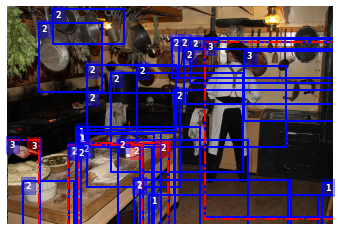

In [51]:
example_image_idx = 0
image_path = 'example_images/' + annotations[example_image_idx]['seg_map']
viz(image_path, results[example_image_idx], annotations[example_image_idx], gt_overlay=True)

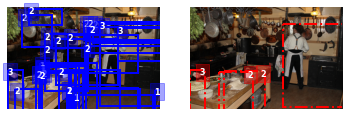

In [52]:
example_image_idx = 0
image_path = 'example_images/' + annotations[example_image_idx]['seg_map']
viz(image_path, results[example_image_idx], annotations[example_image_idx], gt_overlay=False)